#PART B
#Business Problem
A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

#Goal & Objective:
The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse. Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets. This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster #For Interactive Maps of World

In [ ]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
listings= pd.read_csv('/content/Data.csv')
listings.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
pd.options.display.max_columns = None

In [ ]:
listings.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
## Checking the shape of the data: Number of columns and rows

listings.shape

(25000, 24)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req                25000 non-null  int64  
 7   transport_issue               25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
### Examine missing values   What is standard practice of dropping Nan Valus????
listings_na = listings.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

wh_est_year                     11881
workers_num                       990
approved_wh_govt_certificate      908
dtype: int64

In [ ]:
#Target Variable Analysis

In [ ]:
### Let's examine the target column which is product_wg_ton

listings.describe(include="all")["product_wg_ton"]

count     25000.000000
unique             NaN
top                NaN
freq               NaN
mean      22102.632920
std       11607.755077
min        2065.000000
25%       13059.000000
50%       22101.000000
75%       30103.000000
max       55151.000000
Name: product_wg_ton, dtype: float64

In [ ]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 0.5)))
print("  1% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 1)))
print("  5% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 5)))
print(" 10% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 10)))
print(" 90% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 90)))
print(" 95% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 95)))
print(" 99% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 99)))
print("99.5% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 99.5)))

0.5% properties have a product_wg_ton lower than  3090.99
  1% properties have a product_wg_ton lower than  3130.00
  5% properties have a product_wg_ton lower than  5128.00
 10% properties have a product_wg_ton lower than  6134.00
 90% properties have a product_wg_ton lower than  37147.00
 95% properties have a product_wg_ton lower than  43113.00
 99% properties have a product_wg_ton lower than  51075.02
99.5% properties have a product_wg_ton lower than  52117.01


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


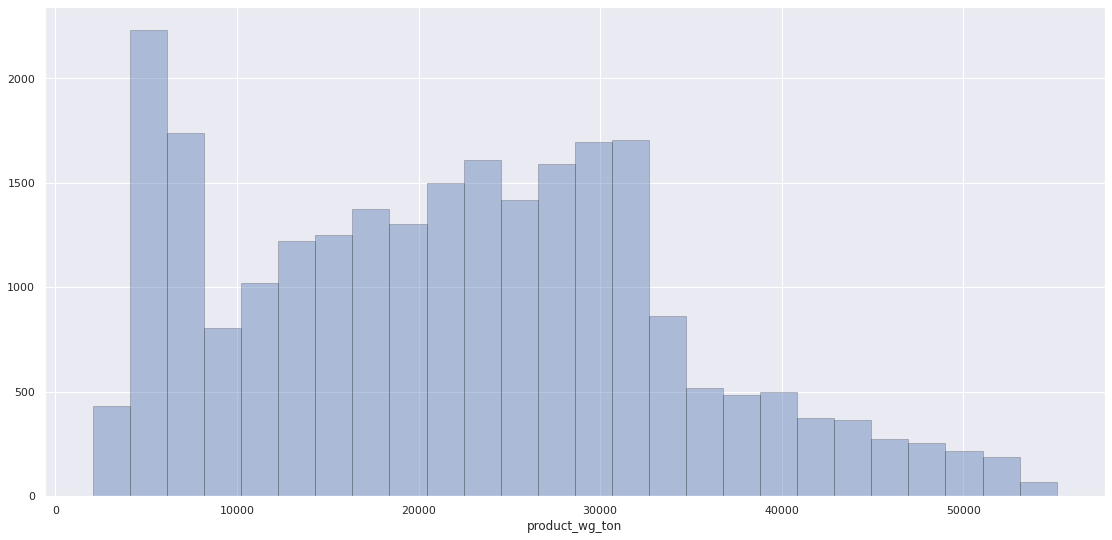

In [ ]:
plt.figure(figsize=(19,9))
sns.distplot(listings["product_wg_ton"],bins = 26,kde = False,color = 'b',hist_kws = {'linewidth' : 0.5,'edgecolor' : 'black'})

In [ ]:
#Log transformation of target variable

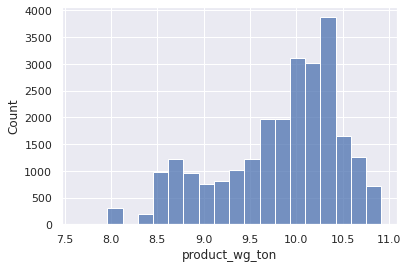

In [ ]:
sns.histplot(np.log(listings["product_wg_ton"]),bins=20);

In [ ]:
listings["flood_impacted"]=listings["flood_impacted"].astype(np.object)
listings["flood_proof"]=listings["flood_proof"].astype(np.object)
listings["electric_supply"]=listings["electric_supply"].astype(np.object)
listings["temp_reg_mach"]=listings["temp_reg_mach"].astype(np.object)

<ipython-input-15-28df6a01928b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  listings["flood_impacted"]=listings["flood_impacted"].astype(np.object)
<ipython-input-15-28df6a01928b>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  listings["flood_proof"]=listings["flood_proof"].astype(np.object)
<ipython-input-15-28df6a01928b>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this wil

In [ ]:
listings.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req                      0
transport_issue                     0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported              0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown                        0
govt_check                          0
product_wg_ton                      0
dtype: int64

In [ ]:
for column in listings[['workers_num', 'wh_est_year']]:
    median = listings[column].median()
    listings[column] = listings[column].fillna(median)

Adding New Feature Duration of Estblished Warehouse Years 

In [ ]:
listings["Current_Year"] = 2023

In [ ]:
listings["Dur_Wh_Est_Year"] = listings["Current_Year"]-listings["wh_est_year"]

In [ ]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req,25000.0,4.08904,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue,25000.0,0.77368,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.10420,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.71156,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.41812,16.064329,15.0,29.0,42.0,56.0,70.0
dist_from_hub,25000.0,163.53732,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,25000.0,28.90700,7.717275,10.0,24.0,28.0,33.0,98.0
wh_est_year,25000.0,2009.20108,5.456731,1996.0,2009.0,2009.0,2010.0,2023.0
storage_issue_reported,25000.0,17.13044,9.161108,0.0,10.0,18.0,24.0,39.0
wh_breakdown,25000.0,3.48204,1.690335,0.0,2.0,3.0,5.0,6.0


In [ ]:
listings.drop('Current_Year',
  axis='columns', inplace=True)

In [ ]:
listings.drop('wh_est_year',
  axis='columns', inplace=True)

In [ ]:
cat = []
num = []
for i in listings.columns:
    if listings[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
x_num=listings[num]
y_cat=listings[cat]

['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach', 'approved_wh_govt_certificate']
['num_refill_req', 'transport_issue', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported', 'wh_breakdown', 'govt_check', 'product_wg_ton', 'Dur_Wh_Est_Year']


In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req                25000 non-null  int64  
 7   transport_issue               25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  object 
 13  f

In [ ]:
for column in ['approved_wh_govt_certificate']:
    listings[column].fillna(listings[column].mode()[0],inplace = True)

In [ ]:
dups = listings.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [ ]:
x_num.describe()

,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported,wh_breakdown,govt_check,product_wg_ton,Dur_Wh_Est_Year
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,163.537320,28.907000,17.130440,3.482040,18.812280,22102.632920,13.798920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,62.718609,7.717275,9.161108,1.690335,8.632382,11607.755077,5.456731
min,0.000000,0.000000,0.000000,1821.000000,15.000000,55.000000,10.000000,0.000000,0.000000,1.000000,2065.000000,0.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,109.000000,24.000000,10.000000,2.000000,11.000000,13059.000000,13.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,164.000000,28.000000,18.000000,3.000000,21.000000,22101.000000,14.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,218.000000,33.000000,24.000000,5.000000,26.000000,30103.000000,14.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,271.000000,98.000000,39.000000,6.000000,32.000000,55151.000000,27.000000


In [ ]:
y_cat.describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,flood_impacted,flood_proof,electric_supply,temp_reg_mach,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,24092
unique,25000,25000,2,3,4,6,2,2,2,2,2,5
top,WH_100000,EID_50000,Rural,Large,North,Zone 6,Company Owned,0,0,1,0,C
freq,1,1,22957,10169,10278,8339,13578,22546,23634,16422,17418,5501


In [ ]:
df_num = listings.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

12

In [ ]:
listings.Dur_Wh_Est_Year.describe()

count    25000.000000
mean        13.798920
std          5.456731
min          0.000000
25%         13.000000
50%         14.000000
75%         14.000000
max         27.000000
Name: Dur_Wh_Est_Year, dtype: float64

In [ ]:
listings.drop(['WH_Manager_ID'], axis='columns', inplace=True)

In [ ]:
listings.drop(['Ware_house_ID'], axis='columns', inplace=True)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req                25000 non-null  int64  
 5   transport_issue               25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  object 
 11  flood_proof                   25000 non-null  object 
 12  electric_supply               25000 non-null  object 
 13  d

In [ ]:
df_cat = listings.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'temp_reg_mach',
 'approved_wh_govt_certificate']

In [ ]:
corr = df_num.corr(method='pearson')

<ipython-input-52-9c73085bab70>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


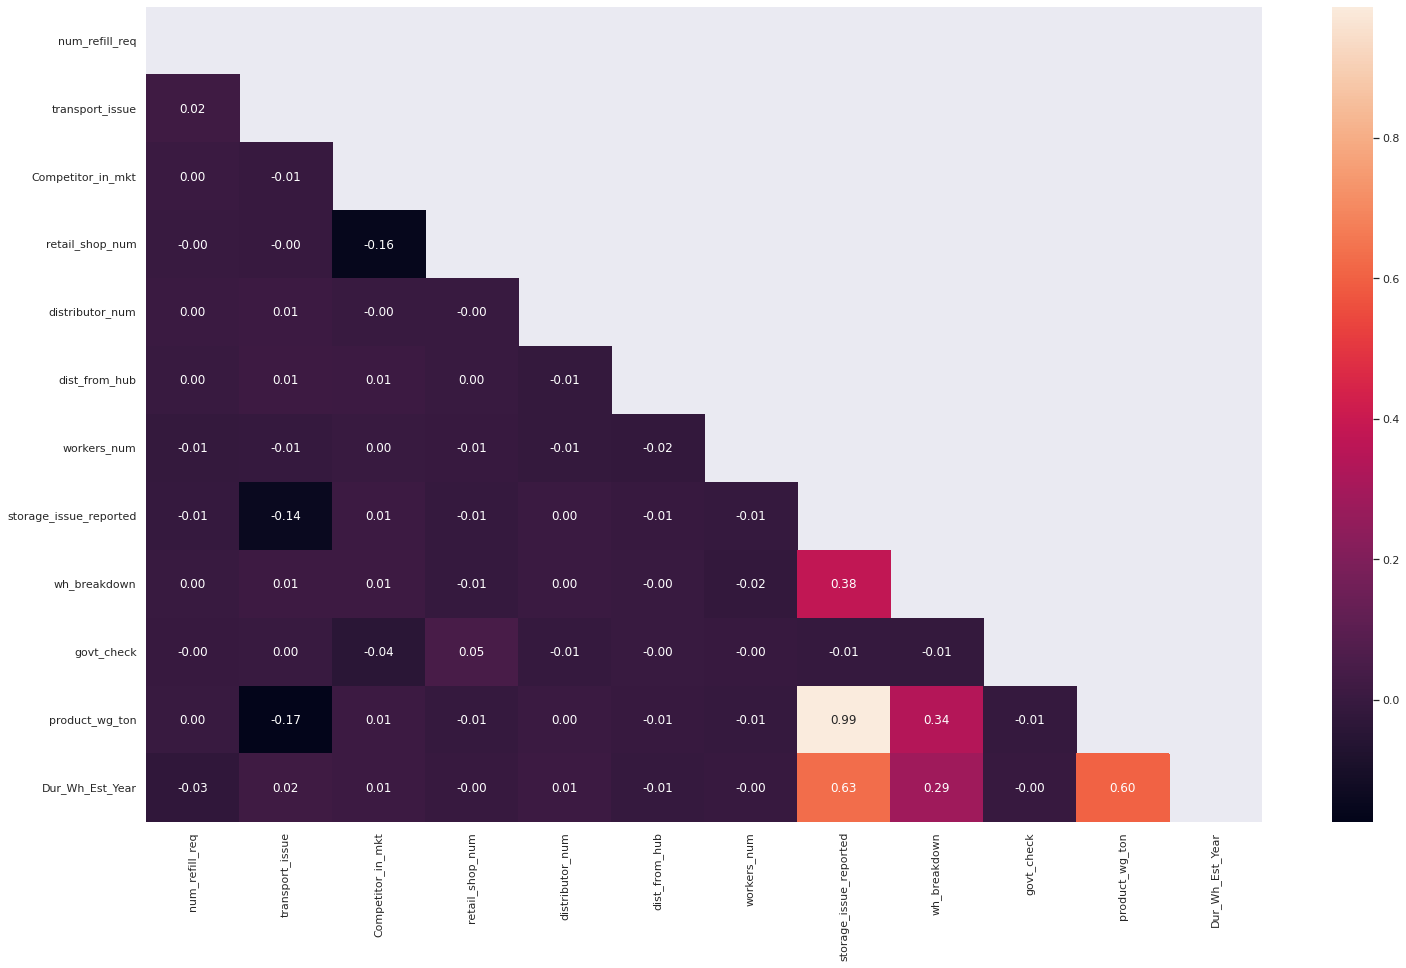

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [ ]:
#Outlier Treatment

In [ ]:
outlier = ['transport_issue','Competitor_in_mkt','retail_shop_num','workers_num','Dur_Wh_Est_Year']

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr,ur=remove_outlier(df_num['transport_issue'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['transport_issue']=np.where(df_num['transport_issue']>ur,ur,df_num['transport_issue'])
df_num['transport_issue']=np.where(df_num['transport_issue']<lr,lr,df_num['transport_issue'])
print('')


Lower Range : -1.5 
Upper Range : 2.5



<ipython-input-57-19af53b53e2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['transport_issue']=np.where(df_num['transport_issue']>ur,ur,df_num['transport_issue'])
<ipython-input-57-19af53b53e2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['transport_issue']=np.where(df_num['transport_issue']<lr,lr,df_num['transport_issue'])


In [ ]:
lr,ur=remove_outlier(df_num['Competitor_in_mkt'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']>ur,ur,df_num['Competitor_in_mkt'])
df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']<lr,lr,df_num['Competitor_in_mkt'])
print('')

Lower Range : -1.0 
Upper Range : 7.0



<ipython-input-58-d9ed6b2912a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']>ur,ur,df_num['Competitor_in_mkt'])
<ipython-input-58-d9ed6b2912a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']<lr,lr,df_num['Competitor_in_mkt'])


In [ ]:
lr,ur=remove_outlier(df_num['retail_shop_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['retail_shop_num']=np.where(df_num['retail_shop_num']>ur,ur,df_num['retail_shop_num'])
df_num['retail_shop_num']=np.where(df_num['retail_shop_num']<lr,lr,df_num['retail_shop_num'])
print('')

Lower Range : 2532.5 
Upper Range : 7280.5



<ipython-input-59-20a60ba38077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['retail_shop_num']=np.where(df_num['retail_shop_num']>ur,ur,df_num['retail_shop_num'])
<ipython-input-59-20a60ba38077>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['retail_shop_num']=np.where(df_num['retail_shop_num']<lr,lr,df_num['retail_shop_num'])


In [ ]:
lr,ur=remove_outlier(df_num['workers_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['workers_num']=np.where(df_num['workers_num']>ur,ur,df_num['workers_num'])
df_num['workers_num']=np.where(df_num['workers_num']<lr,lr,df_num['workers_num'])
print('')

Lower Range : 10.5 
Upper Range : 46.5



<ipython-input-60-cc53fed26468>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['workers_num']=np.where(df_num['workers_num']>ur,ur,df_num['workers_num'])
<ipython-input-60-cc53fed26468>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['workers_num']=np.where(df_num['workers_num']<lr,lr,df_num['workers_num'])


In [ ]:
lr,ur=remove_outlier(df_num['Dur_Wh_Est_Year'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']>ur,ur,df_num['Dur_Wh_Est_Year'])
df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']<lr,lr,df_num['Dur_Wh_Est_Year'])
print('')

Lower Range : 11.5 
Upper Range : 15.5



<ipython-input-61-85f511993c6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']>ur,ur,df_num['Dur_Wh_Est_Year'])
<ipython-input-61-85f511993c6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']<lr,lr,df_num['Dur_Wh_Est_Year'])


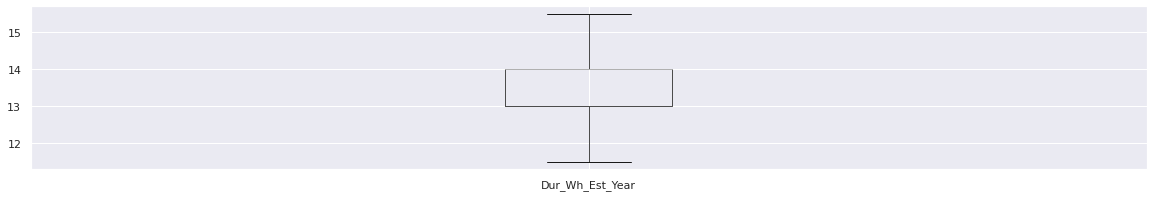

In [ ]:
df_num.boxplot('Dur_Wh_Est_Year',figsize=(20,3))

In [ ]:
df = pd.concat([df_cat, df_num], axis=1)

In [ ]:
cat1=['Location_type','zone', 'WH_regional_zone',
       'wh_owner_type']

In [ ]:
df_new =pd.get_dummies(df, columns=cat1,drop_first=True)

In [ ]:
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Small',0)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Mid',1)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Large',2)

In [ ]:
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A+',5)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A',4)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B+',3)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B',2)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('C',1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_new.columns=df_new.columns.str.replace(' ','_')

Building Regression Models

In [ ]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = df_new.drop('product_wg_ton', axis=1)

In [ ]:
# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y =df_new.pop('product_wg_ton')

In [ ]:
X.shape

(25000, 27)

In [ ]:
y.shape

(25000,)

In [ ]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [ ]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

In [ ]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [ ]:
def percentage_error(actual,predicted):
    res =np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j]!=0:
            res[j]=(actual[j]-predicted[j])/actual[j]
        else:
            res[j] = predicted[j]/np.mean(actual)
    return res
def mape(y_true, y_pred):
    return np.mean(np.abs(percentage_error(np.asarray(y_true),np.asarray(y_pred))))*100

In [ ]:
annr = MLPRegressor(hidden_layer_sizes=(250),random_state=123, max_iter=1000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier 
   if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        mape_train.append(mape(y_train,i.predict(x_train)))
        mape_test.append(mape(y_test,i.predict(x_test)))

   else:
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train,i.predict(x_train_scaled)))
        mape_test.append(mape(y_test,i.predict(x_test_scaled)))

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,'Taining MAPE': mape_train,'Test MAPE' : mape_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                          Train RMSE    Test RMSE  Training Score  Test Score  \
Linear Regression        1744.605000  1760.647905        0.977398    0.977021   
Decision Tree Regressor     0.000000  1250.725933        1.000000    0.988404   
Random Forest Regressor   342.542504   931.400962        0.999129    0.993569   
ANN Regressor            1072.283522  1157.639978        0.991462    0.990066   

                         Taining MAPE  Test MAPE  
Linear Regression            8.906356   9.149702  
Decision Tree Regressor      0.000000   5.093023  
Random Forest Regressor      1.542697   4.270517  
ANN Regressor                5.167553   5.654945  


In [ ]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 40}


In [ ]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [ ]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [ ]:
param_grid = {
    'hidden_layer_sizes':[25,50,100], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 2)

In [ ]:
grid_search.fit(x_train_scaled,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron

GridSearchCV(cv=2, estimator=MLPRegressor(max_iter=1000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [25, 50, 100],
                         'solver': ['sgd', 'adam']})

In [ ]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'adam'}


In [ ]:
annr  = MLPRegressor(activation='relu', hidden_layer_sizes=(100), 
                    solver='adam',random_state=123, 
                    max_iter=1000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 300,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier 
   if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        mape_train.append(mape(y_train,i.predict(x_train)))
        mape_test.append(mape(y_test,i.predict(x_test)))

   else:
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train,i.predict(x_train_scaled)))
        mape_test.append(mape(y_test,i.predict(x_test_scaled)))

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,'Taining MAPE': mape_train,'Test MAPE' : mape_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                          Train RMSE    Test RMSE  Training Score  Test Score  \
Linear Regression        1744.605000  1760.647905        0.977398    0.977021   
Decision Tree Regressor   847.965507   954.163756        0.994660    0.993251   
Random Forest Regressor  2110.658138  2282.903578        0.966918    0.961367   
ANN Regressor            1228.992631  1289.817158        0.988784    0.987668   

                         Taining MAPE  Test MAPE  
Linear Regression            8.906356   9.149702  
Decision Tree Regressor      3.781706   4.338371  
Random Forest Regressor     10.927756  11.831595  
ANN Regressor                5.829211   6.198369  


Text(0.5, 0, 'Random Forest Feature Importance')

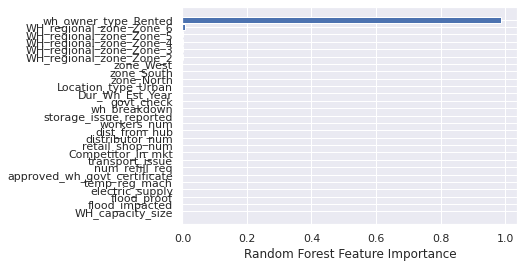

In [ ]:
sorted_idx = dtr.feature_importances_.argsort()
plt.barh(x_train.columns,dtr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
pred = dtr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


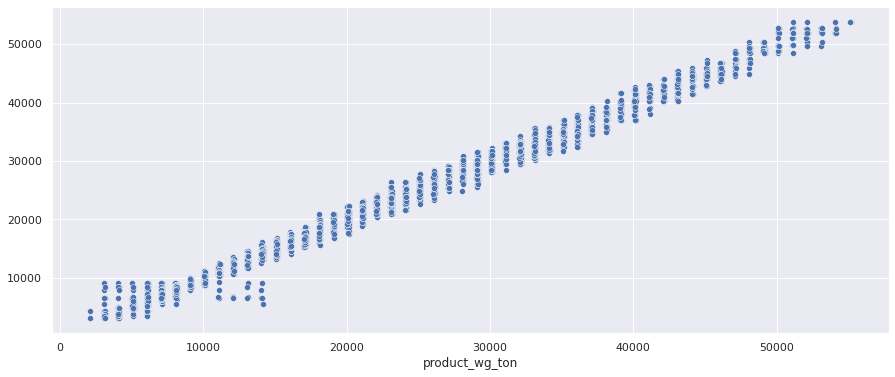

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(y_test,pred)

# Recommendations based on best model important features:

Wh_owner_type_rented.
Wh_regional_zone_6
Wh_regional_zone_5
Wh_regional_zone_4
#Insight 1.
91.25 % warehouses are in rural areas in comparison of rural area has 8.17%.
#Insight 2.
82 % warehouses are of large & mid type.
#Insight 3:
North zone & Zone 6 has majority of warehouses.
#Insight 4:
Avg Product wt tone is supplied more to urban area in comparison of rural area
#Recommendation 1:
Product wt tone should be supplied to be increased for rural area. Those warehouses are in urban areas should managed properly to cater more customer demand.
#Insight 5:
Govt checks are more in zone 3 & zone 4.
#Recommendation 2:
In zone 3 & zone 4,all documents should be maintained properly for audit purposes to avoid unnecessary breakdown.
#Insight 6:
Warehouse breakdown are more in urban zone than rural zone.
#Recommendation 3:
Strike from worker, flood, or electrical failure should be taken care properly by respective managers to reduce warehouse breakdowns.
#Insight 7:
Older warehouses are more in urban area comparison of rural area.
#Recommendation 4:
Renovation of roofs, pallets and others broken racks etc should be done to avoid unnecessary loss of product.
#Insight 8:
Transport issues are more in urban areas in comparison of rural area.
#Recommendation 5:
Latest technology could be used like drone to avoid delays.
#Insight 9:
Wh_Regional _Zone 6 has most number of breakdowns than 5 followed by zone 4.
Recommendation 6:
In zone 6 specially ,electricity, worker strike & flood failure should be checked & planned in advance to avoid these failure.
#Insight 10:
Company owned warehouses has more numbers of workers than rented whereas supply is same.
#Recommendation 7:
HR manager should refer rented warehouse system as benchmark for company owned warehouse.
#Insight 11:
No of refills are more in urban areas than rural areas.
Recommendation 8: Transportation system of urban areas must be improved.
#Insight 12:
Storage issues are more where product is stored more.
#Recommendation 9:
Large & medium size specially older warehouses warehouses renovation must be done properly.

#END